# Week 3: Python Fundamentals for AI/ML
**Duration:** 1 Hour  
**Target:** Advanced High School Students

## Learning Objectives
By the end of this session, students will be able to:
- Read and write files using Python's built-in functions and pandas
- Create and use Python classes for data organization
- Generate basic visualizations using matplotlib, seaborn, and plotly
- Perform data manipulation operations using pandas with real-world datasets

---
















## Part 3: Data Visualization (15 minutes)

### 3.1 Matplotlib Basics

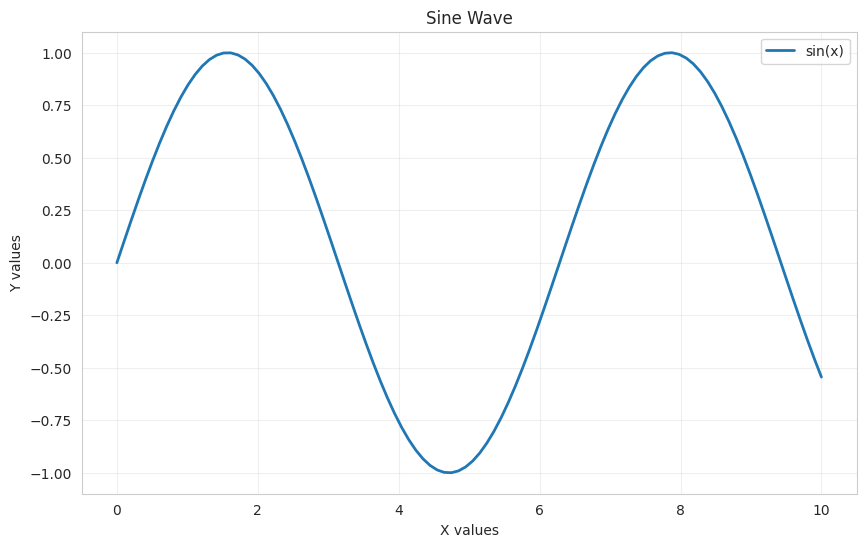

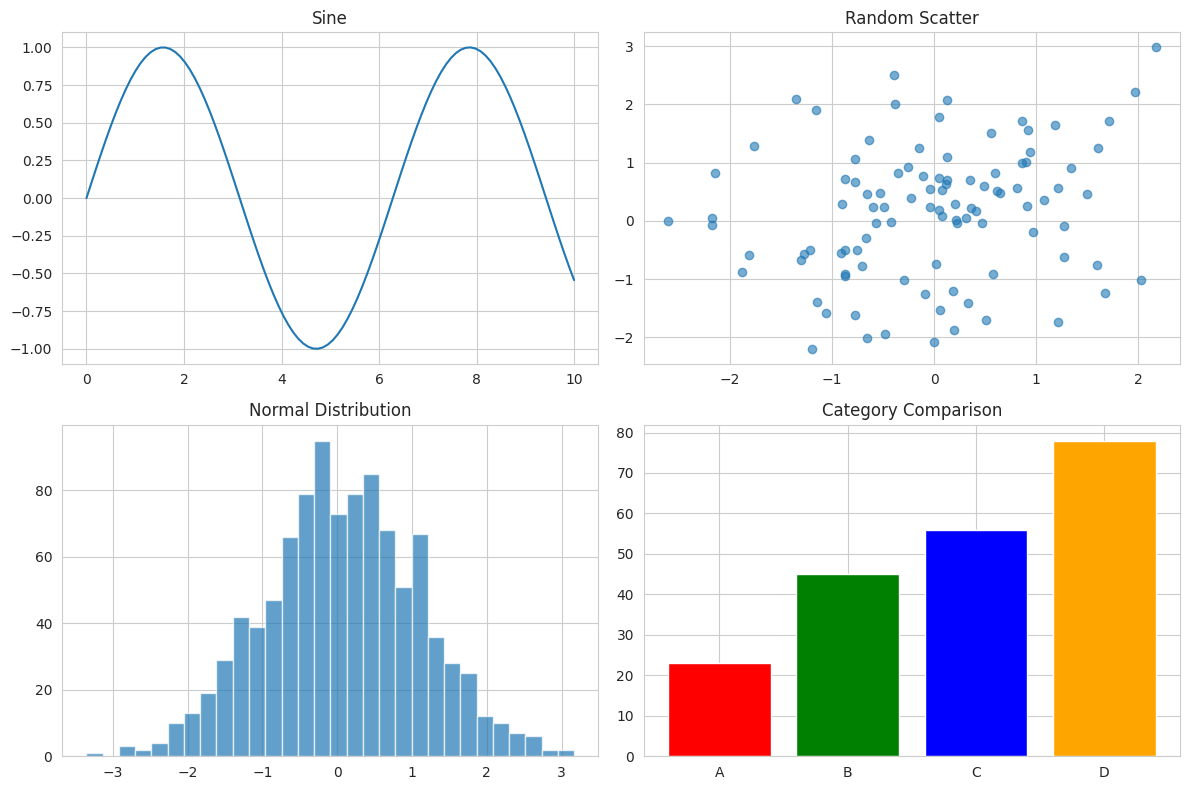

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# Basic plotting
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', linewidth=2)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Sine Wave')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Line plot
axes[0,0].plot(x, np.sin(x))
axes[0,0].set_title('Sine')

# Subplot 2: Scatter plot
axes[0,1].scatter(np.random.randn(100), np.random.randn(100), alpha=0.6)
axes[0,1].set_title('Random Scatter')

# Subplot 3: Histogram
axes[1,0].hist(np.random.normal(0, 1, 1000), bins=30, alpha=0.7)
axes[1,0].set_title('Normal Distribution')

# Subplot 4: Bar plot
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
axes[1,1].bar(categories, values, color=['red', 'green', 'blue', 'orange'])
axes[1,1].set_title('Category Comparison')

plt.tight_layout()
plt.show()


### 3.2 Introduction to Seaborn

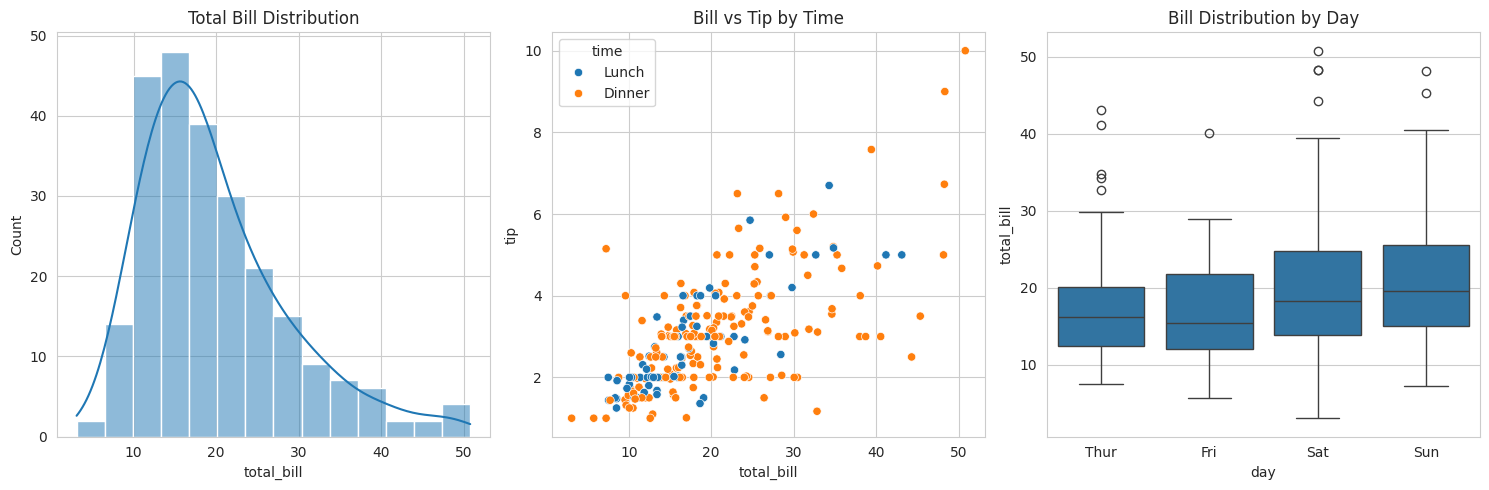

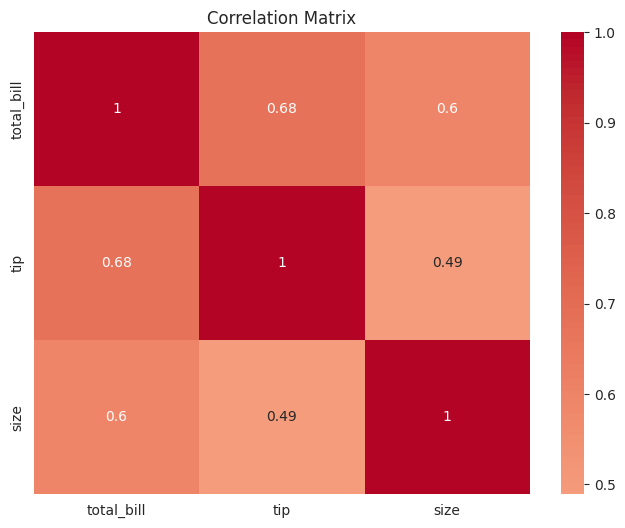

In [19]:
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Sample data
tips = sns.load_dataset("tips")

# Basic plots
plt.figure(figsize=(15, 5))

# Subplot 1: Distribution plot
plt.subplot(1, 3, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Total Bill Distribution')

# Subplot 2: Relationship plot
plt.subplot(1, 3, 2)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title('Bill vs Tip by Time')

# Subplot 3: Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Bill Distribution by Day')

plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_cols = tips.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


### 3.3 Introduction to Plotly

In [20]:
import plotly.graph_objects as go
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(tips, x='total_bill', y='tip',
                 color='time', size='size',
                 hover_data=['day'],
                 title='Interactive Tip Analysis')
fig.show()

# 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=np.random.randn(100),
    y=np.random.randn(100),
    z=np.random.randn(100),
    mode='markers',
    marker=dict(
        size=12,
        color=np.random.randn(100),
        colorscale='Viridis',
        opacity=0.6
    )
)])
fig.update_layout(title='3D Scatter Plot')
fig.show()

## Part 4: Advanced Pandas Data Manipulation (15 minutes)

### 4.1 DataFrame Creation and Basic Operations

In [21]:
import pandas as pd
import numpy as np

# Creating sample dataset
np.random.seed(42)
data = {
    'student_id': range(1, 101),
    'name': [f'Student_{i}' for i in range(1, 101)],
    'age': np.random.randint(15, 19, 100),
    'grade': np.random.choice(['A', 'B', 'C', 'D'], 100, p=[0.2, 0.3, 0.3, 0.2]),
    'math_score': np.random.randint(60, 100, 100),
    'science_score': np.random.randint(65, 98, 100),
    'english_score': np.random.randint(70, 95, 100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston'], 100)
}

df = pd.DataFrame(data)
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

   student_id       name  age grade  math_score  science_score  english_score  \
0           1  Student_1   17     D          92             91             84   
1           2  Student_2   18     C          60             91             86   
2           3  Student_3   15     D          78             85             83   
3           4  Student_4   17     D          61             94             89   
4           5  Student_5   17     C          85             97             74   

          city  
0  Los Angeles  
1     New York  
2     New York  
3  Los Angeles  
4      Houston  

Dataset shape: (100, 8)

Data types:
student_id        int64
name             object
age               int64
grade            object
math_score        int64
science_score     int64
english_score     int64
city             object
dtype: object


### 4.2 Data Filtering and Selection

In [22]:

# Boolean indexing
high_performers = df[df['math_score'] > 85]
print(f"High performers in math: {len(high_performers)}")

# Multiple conditions
excellent_students = df[(df['math_score'] > 90) & (df['science_score'] > 90)]
print(f"Excellent in both math and science: {len(excellent_students)}")

# Using query method (more readable)
top_students = df.query('math_score > 85 and age < 17')
print(f"Young high performers: {len(top_students)}")

# Selecting specific columns
scores_only = df[['name', 'math_score', 'science_score', 'english_score']]

# Using loc and iloc
specific_students = df.loc[df['city'] == 'New York', ['name', 'math_score']]
first_10_rows = df.iloc[:10, 1:4]  # First 10 rows, columns 1-3

High performers in math: 35
Excellent in both math and science: 10
Young high performers: 16


### 4.3 Data Transformation and Feature Engineering

In [23]:

# Creating new columns
df['total_score'] = df['math_score'] + df['science_score'] + df['english_score']
df['average_score'] = df['total_score'] / 3
df['performance_category'] = pd.cut(df['average_score'],
                                   bins=[0, 70, 80, 90, 100],
                                   labels=['Below Average', 'Average', 'Good', 'Excellent'])

# Apply functions
def categorize_age(age):
    if age <= 16:
        return 'Younger'
    else:
        return 'Older'

df['age_group'] = df['age'].apply(categorize_age)

# Lambda functions
df['math_percentile'] = df['math_score'].rank(pct=True) * 100

# String operations
df['name_length'] = df['name'].str.len()
df['name_upper'] = df['name'].str.upper()

### 4.4 Groupby Operations and Aggregations

In [24]:

# Basic groupby
city_stats = df.groupby('city').agg({
    'math_score': ['mean', 'std', 'count'],
    'science_score': ['mean', 'max', 'min'],
    'age': 'mean'
}).round(2)

print("City-wise Statistics:")
print(city_stats)

# Multiple grouping variables
grade_city_stats = df.groupby(['grade', 'city'])['average_score'].agg(['mean', 'count'])
print("\nGrade and City Statistics:")
print(grade_city_stats)

# Custom aggregation functions
def score_range(scores):
    return scores.max() - scores.min()

custom_stats = df.groupby('city').agg({
    'math_score': [score_range, 'mean'],
    'total_score': ['sum', 'count']
})

# Transform operations (keep original dataframe size)
df['city_avg_math'] = df.groupby('city')['math_score'].transform('mean')
df['math_vs_city_avg'] = df['math_score'] - df['city_avg_math']

City-wise Statistics:
            math_score              science_score            age
                  mean    std count          mean max min   mean
city                                                            
Chicago          79.68  12.00    25         84.28  97  67  16.64
Houston          79.41  10.24    22         84.50  97  65  16.59
Los Angeles      82.48  11.76    21         80.90  96  65  16.52
New York         78.47  13.48    32         83.38  97  66  16.75

Grade and City Statistics:
                        mean  count
grade city                         
A     Chicago      82.166667      6
      Houston      82.000000      3
      Los Angeles  80.238095      7
      New York     80.000000      6
B     Chicago      80.515152     11
      Houston      81.380952      7
      Los Angeles  83.222222      3
      New York     77.925926      9
C     Chicago      82.733333      5
      Houston      82.333333      6
      Los Angeles  81.333333      4
      New York     82.40000

### 4.5 Pivot Tables and Reshaping

In [25]:
# Pivot table
pivot_grades = pd.pivot_table(df,
                             values=['math_score', 'science_score'],
                             index='city',
                             columns='grade',
                             aggfunc='mean',
                             fill_value=0).round(2)

print("Pivot Table - Scores by City and Grade:")
print(pivot_grades)

# Melting (wide to long format)
score_columns = ['math_score', 'science_score', 'english_score']
df_melted = pd.melt(df,
                   id_vars=['student_id', 'name', 'city'],
                   value_vars=score_columns,
                   var_name='subject',
                   value_name='score')

print("\nMelted DataFrame (first 10 rows):")
print(df_melted.head(10))

# Cross-tabulation
crosstab = pd.crosstab(df['city'], df['performance_category'], normalize='columns')
print("\nCross-tabulation (City vs Performance):")
print(crosstab.round(3))


Pivot Table - Scores by City and Grade:
            math_score                      science_score                     
grade                A      B      C      D             A      B      C      D
city                                                                          
Chicago          85.17  78.00  80.60  73.33         82.83  82.91  86.80  88.00
Houston          79.00  78.14  76.67  83.83         80.33  78.29  90.83  87.50
Los Angeles      78.00  84.00  90.75  81.57         78.71  80.00  77.75  85.29
New York         65.33  79.00  81.80  84.29         92.33  79.11  83.70  80.71

Melted DataFrame (first 10 rows):
   student_id        name         city     subject  score
0           1   Student_1  Los Angeles  math_score     92
1           2   Student_2     New York  math_score     60
2           3   Student_3     New York  math_score     78
3           4   Student_4  Los Angeles  math_score     61
4           5   Student_5      Houston  math_score     85
5           6   Student_

### 4.6 Handling Missing Data and Advanced Operations

In [26]:
# Introduce some missing values for demonstration
df_with_missing = df.copy()
missing_indices = np.random.choice(df.index, size=20, replace=False)
df_with_missing.loc[missing_indices, 'math_score'] = np.nan

# Handling missing values
print(f"Missing values per column:\n{df_with_missing.isnull().sum()}")

# Fill missing values
df_filled = df_with_missing.copy()
df_filled['math_score'].fillna(df_filled['math_score'].mean(), inplace=True)

# Forward fill and backward fill
df_filled['math_score_ffill'] = df_with_missing['math_score'].fillna(method='ffill')
df_filled['math_score_bfill'] = df_with_missing['math_score'].fillna(method='bfill')

# Interpolation
df_filled['math_score_interp'] = df_with_missing['math_score'].interpolate()

# Detecting outliers using IQR
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['math_score'] < lower_bound) | (df['math_score'] > upper_bound)]
print(f"\nOutliers in math scores: {len(outliers)}")


Missing values per column:
student_id               0
name                     0
age                      0
grade                    0
math_score              20
science_score            0
english_score            0
city                     0
total_score              0
average_score            0
performance_category     0
age_group                0
math_percentile          0
name_length              0
name_upper               0
city_avg_math            0
math_vs_city_avg         0
dtype: int64

Outliers in math scores: 0


/tmp/ipython-input-26-325835912.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-26-325835912.py:14: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipython-input-26-325835912.py:15: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



## Practical Exercise (In-Class Demo)

### Complete Example: Student Performance Analysis

In [27]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
data = {
    'student_id': range(1, 101),
    'name': ['Student_' + str(i) for i in range(1, 101)],
    'age': np.random.randint(14, 20, size=100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=100),
    'math': np.random.normal(70, 15, size=100).astype(int),
    'science': np.random.normal(75, 12, size=100).astype(int),
    'english': np.random.normal(80, 10, size=100).astype(int)
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
df.loc[10:15, 'math'] = np.nan
df.loc[20:22, 'science'] = np.nan
df.loc[30:35, 'age'] = np.nan

# Save to CSV
df.to_csv('student_data.csv', index=False)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   name        100 non-null    object 
 2   age         94 non-null     float64
 3   city        100 non-null    object 
 4   math        94 non-null     float64
 5   science     97 non-null     float64
 6   english     100 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 5.6+ KB
None

First few rows:
   student_id       name   age      city  math  science  english
0           1  Student_1  17.0   Phoenix  69.0     85.0       86
1           2  Student_2  18.0  New York  75.0     69.0       57
2           3  Student_3  16.0  New York  68.0     80.0       55
3           4  Student_4  18.0  New York  66.0     66.0       79
4           5  Student_5  18.0  New York  91.0     53.0       74

Performance by City:
              

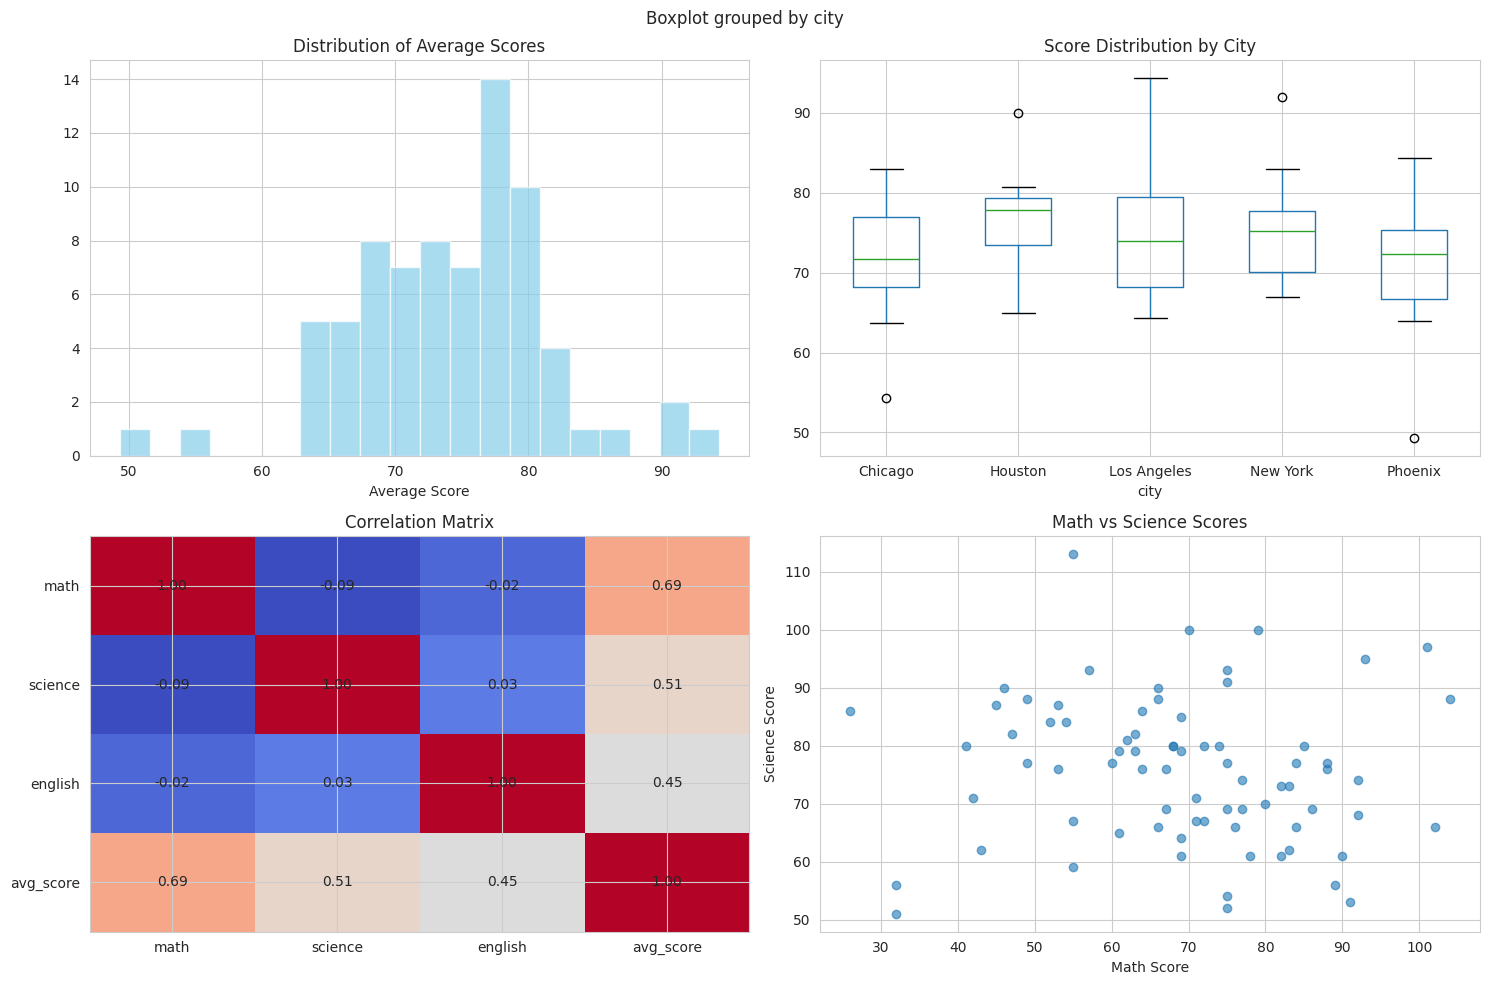

In [28]:

# Load and explore data
df = pd.read_csv('student_data.csv')  # Assume this file exists
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Data cleaning
df_clean = df.dropna()
df_clean = df_clean[df_clean['age'].between(15, 19)]  # Remove unrealistic ages

# Feature engineering
df_clean['total_score'] = df_clean[['math', 'science', 'english']].sum(axis=1)
df_clean['avg_score'] = df_clean['total_score'] / 3

# Analysis
print("\nPerformance by City:")
city_performance = df_clean.groupby('city')['avg_score'].agg(['mean', 'std', 'count'])
print(city_performance)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of average scores
axes[0,0].hist(df_clean['avg_score'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Average Scores')
axes[0,0].set_xlabel('Average Score')

# Scores by city
df_clean.boxplot(column='avg_score', by='city', ax=axes[0,1])
axes[0,1].set_title('Score Distribution by City')

# Correlation heatmap
score_cols = ['math', 'science', 'english', 'avg_score']
corr_matrix = df_clean[score_cols].corr()
im = axes[1,0].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[1,0].set_xticks(range(len(score_cols)))
axes[1,0].set_yticks(range(len(score_cols)))
axes[1,0].set_xticklabels(score_cols)
axes[1,0].set_yticklabels(score_cols)
axes[1,0].set_title('Correlation Matrix')

# Add correlation values
for i in range(len(score_cols)):
    for j in range(len(score_cols)):
        axes[1,0].text(j, i, f'{corr_matrix.iloc[i,j]:.2f}',
                      ha='center', va='center')

# Scatter plot
axes[1,1].scatter(df_clean['math'], df_clean['science'], alpha=0.6)
axes[1,1].set_xlabel('Math Score')
axes[1,1].set_ylabel('Science Score')
axes[1,1].set_title('Math vs Science Scores')

plt.tight_layout()
plt.show()